# **ANALYSER LES TRANSACTIONS BANCAIRES POUR IDENTIFIER DES SCHEMAS DE FRAUDE**

L'ensemble de données analysé contient les transactions par carte de crédit réalisées en septembre 2013 par des titulaires européens. Il couvre une période de deux jours, durant laquelle 492 cas de fraude ont été identifiés sur un total de 284 807 transactions. Cet ensemble est fortement déséquilibré, la classe positive (fraudes) ne représentant que 0,172 % des transactions.
L'objectif de cette analyse exploratoire est de comprendre la structure des données, d'examiner leur distribution, et d'identifier les variables clés ainsi que leurs relations. Nous utilisons pour cela des bibliothèques Python telles que pandas, numpy, scipy, et matplotlib/seaborn. Par ailleurs, un tableau de bord interactif a été développé avec Streamlit pour visualiser les résultats de l'analyse exploratoire des données (Exploratory Data Analysis - EDA).






# **INTRODUCTION**

Une transaction frauduleuse désigne une activité non autorisée ou illégale exploitant des instruments de paiement ou des systèmes financiers, généralement dans le but d’obtenir de l’argent, des biens ou des services sans le consentement du titulaire du compte.
Comment analyser les transactions bancaires afin d’identifier des schémas de fraude ? Pour répondre à cette question, nous réalisons une analyse exploratoire des données (Exploratory Data Analysis - EDA) en suivant plusieurs étapes clés : le profilage des données, l’analyse descriptive univariée, et l’analyse descriptive multivariée.


# **I. PROFILAGE ET VISUALISATION DES DONNEES**

Cette étape vise à obtenir une vue d'ensemble des données disponibles.



**1.   Structure des données**

Nous allons commencer par installer et impoter les bibliothèques dont nous aurons besoin

In [ ]:
#installations des bibliothèques missingno et skimpy
!pip install missingno
!pip install skimpy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim
import missingno as msno
from scipy.stats import shapiro
from scipy import stats
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#importer le dataset
df=pd.read_csv("/content/creditcard.csv",sep=',')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

Le dataset est disponible sur Kaggle (https://www.kaggle.com/datasets/mlgulb/creditcardfraud). Ici nous avons **284807** individus (transactions) décrits par **31** variables.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Toutes les variables caractéristiques (features) sont de type float64, ce qui indique qu'elles représentent des données quantitatives continues. La variable cible, Class, est de type int64, une donnée qualitative nominale.

* **Time** : Nombre de secondes écoulées depuis la première transaction enregistrée jusqu'à la transaction en cours.
* **V1 à V28** : Variables dérivées d'une réduction de dimensionnalité par l'algorithme PCA (Principal Component Analysis). Ces variables ont été anonymisées pour préserver la confidentialité des clients.
* **Amount** : Montant de la transaction.
* **Class** : Variable cible indiquant deux classes : 0 pour une transaction normale et 1 pour une transaction frauduleuse.


**2.  Valeurs manquantes**


In [ ]:
duplication=df.duplicated().sum()
duplication

1081

Le dataset contient 1081 doublons

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(283726, 31)

Après suppression de ces doublons, le dataset contient à présent **283726** transactions décrites par **31** variables. Dans la suite, la fonction percent_missing() nous permet de vérifier si le dataset contient des données manquantes et le pourcentage de données manquantes pour chaque variable.

In [ ]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    print(percent_nan)
    return percent_nan

In [ ]:
percent_missing(df)

Series([], dtype: float64)


,0


<Axes: >

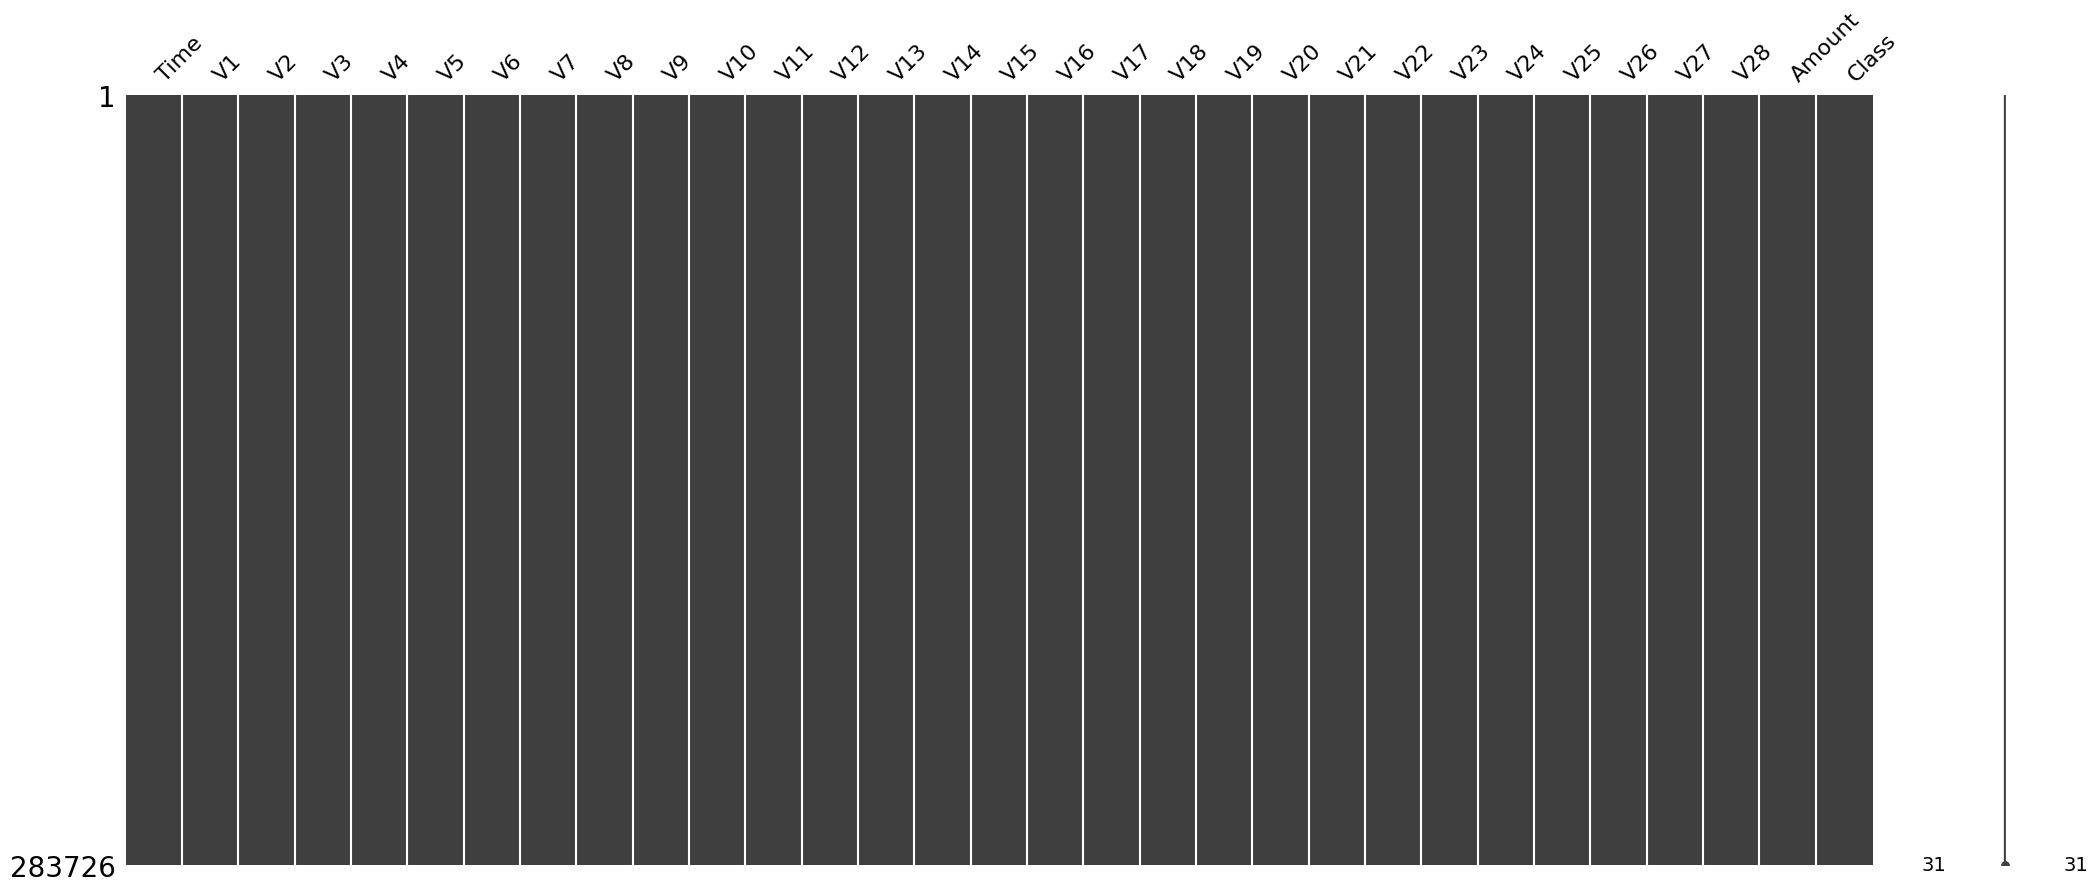

In [ ]:
msno.matrix(df)

# **II.  Statistiques descriptives univariée**



**1.   Distribution des variables**



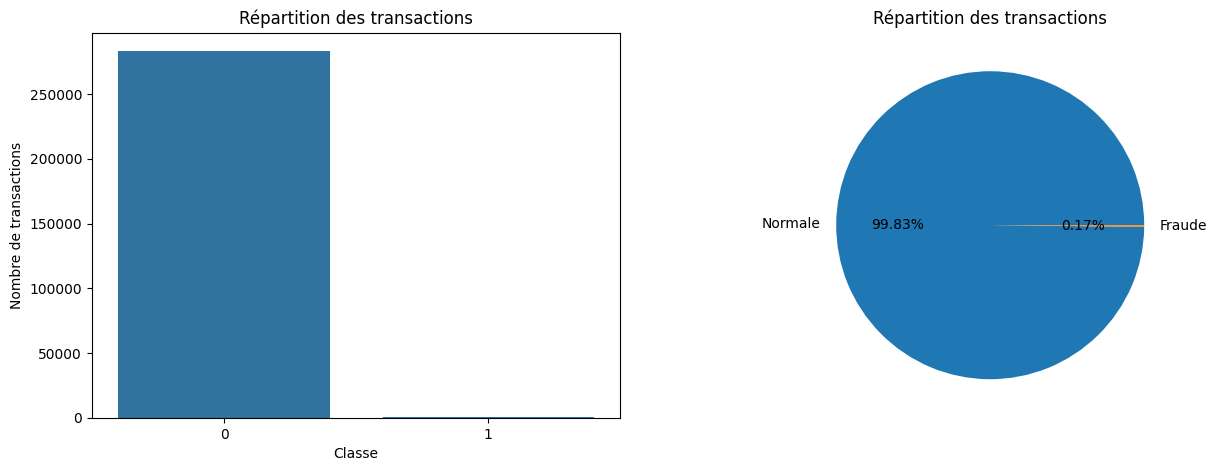

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x='Class',data=df, ax=axes[0])
axes[0].set_title('Répartition des transactions')
axes[0].set_xlabel('Classe')
axes[0].set_ylabel('Nombre de transactions')
axes[1].pie(df['Class'].value_counts(), labels=['Normale', 'Fraude'], autopct='%1.2f%%')
plt.title('Répartition des transactions')
plt.show()
plt.tight_layout()

Grâce au diagramme à barres et au diagramme circulaire, nous remarquons que le dataset est fortement déséquilibré. les transactions frauduleuses ne représentent que **0.17%** de données dans notre dataset.

In [ ]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 283726 │ │ float64     │ 30    │                                                          │
│ │ Number of columns │ 31     │ │ int64       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name  ┃ NA ┃ NA % ┃ mean       ┃ sd     ┃ p0     ┃ p25      ┃ p50       ┃ p75     ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ Time         │  0 │    0 │      94810 │  47480 │      0 │    54200 │     84690 │  139300 │ 172800 │ ▂▇▇▂▇▇ │  │
│ │ V1           │  0 │    0 │   0.005917 │  1.948 │ -56.41 │   -0.916 │   0.02038 │   1.316 │  2.455 │      ▇ │  │
│ │ V2           │  0 │    0 │  -0.004135 │  1.647 │ -72.72 │  -0.6003 │   0.06395 │  0.8003 │  22.06 │     ▇  │  │
│ │ V3           │  0 │    0 │   0.001613 │  1.509 │ -48.33 │  -0.8897 │      0.18 │   1.027 │  9.383 │     ▅▇ │  │
│ │ V4           │  0 │    0 │  -0.002966 │  1.414 │ -5.683 │  -0.8501 │  -0.02225 │  0.7396 │  16.88 │  ▁▇▁   │  │
│ │ V5           │  0 │    0 │   0.001828 │  1.377 │ -113.7 │  -0.6898 │  -0.05347 │  0.6122 │   34.8 │     ▇  │  │
│ │ V6           │  0 │    0 │  -0.001139 │  1.332 │ -26.16 │   -0.769 │   -0.2752 │  0.3968 │   73.3 │    ▇   │  │
│ │ V7           │  0 │    0 │   0.001801 │  1.228 │ -43.56 │  -0.5525 │   0.04086 │  0.5705 │  120.6 │    ▇   │  │
│ │ V8           │  0 │    0 │ -0.0008545 │  1.179 │ -73.22 │  -0.2088 │    0.0219 │  0.3257 │  20.01 │     ▇  │  │
│ │ V9           │  0 │    0 │  -0.001596 │  1.095 │ -13.43 │  -0.6442 │   -0.0526 │   0.596 │  15.59 │    ▇▁  │  │
│ │ V10          │  0 │    0 │  -0.001441 │  1.076 │ -24.59 │  -0.5356 │  -0.09324 │  0.4536 │  23.75 │    ▃▇  │  │
│ │ V11          │  0 │    0 │  0.0002018 │  1.019 │ -4.797 │  -0.7616 │  -0.03231 │  0.7396 │  12.02 │   ▇▂   │  │
│ │ V12          │  0 │    0 │ -0.0007148 │ 0.9947 │ -18.68 │  -0.4062 │    0.1391 │   0.617 │  7.848 │    ▁▇  │  │
│ │ V13          │  0 │    0 │  0.0006034 │ 0.9954 │ -5.792 │  -0.6479 │  -0.01293 │  0.6632 │  7.127 │   ▁▇▃  │  │
│ │ V14          │  0 │    0 │  0.0002523 │ 0.9522 │ -19.21 │  -0.4257 │   0.05021 │  0.4923 │  10.53 │    ▇▂  │  │
│ │ V15          │  0 │    0 │   0.001043 │ 0.9149 │ -4.499 │  -0.5815 │    0.0493 │  0.6501 │  8.878 │   ▇▇   │  │
│ │ V16          │  0 │    0 │   0.001162 │ 0.8737 │ -14.13 │  -0.4669 │   0.06712 │  0.5235 │  17.32 │    ▇   │  │
│ │ V17          │  0 │    0 │  0.0001702 │ 0.8425 │ -25.16 │  -0.4839 │  -0.06587 │   0.399 │  9.254 │     ▇  │  │
│ │ V18          │  0 │    0 │   0.001515 │ 0.8374 │ -9.499 │   -0.498 │ -0.002142 │   0.502 │  5.041 │    ▇▅  │  │
│ │ V19          │  0 │    0 │ -0.0002643 │ 0.8134 │ -7.214 │  -0.4563 │  0.003367 │  0.4585 │  5.592 │    ▁▇  │  │
│ │ V20          │  0 │    0 │  0.0001872 │   0.77 │  -54.5 │  -0.2115 │  -0.06235 │  0.1332 │  39.42 │     ▇  │  │
│ │ V21          │  0 │    0 │ -0.0003706 │ 0.7239 │ -34.83 │  -0.2283 │  -0.02944 │  0.1862 │   27.2 │     ▇  │  │
│ │ V22          │  0 │    0 │ -1.503e-05 │ 0.7246 │ -10

Ce tableau permet de visualiser pour chacune des variables les caractéristiques de tendance centrale qui sont *la moyenne (mean) et la médiane (p50)*, et une caractéristique de dispersion qui est *l'écart type (sd)*. A l'aide des histogrammes nous pourrons visualiser la distribution de chacune de ces variables

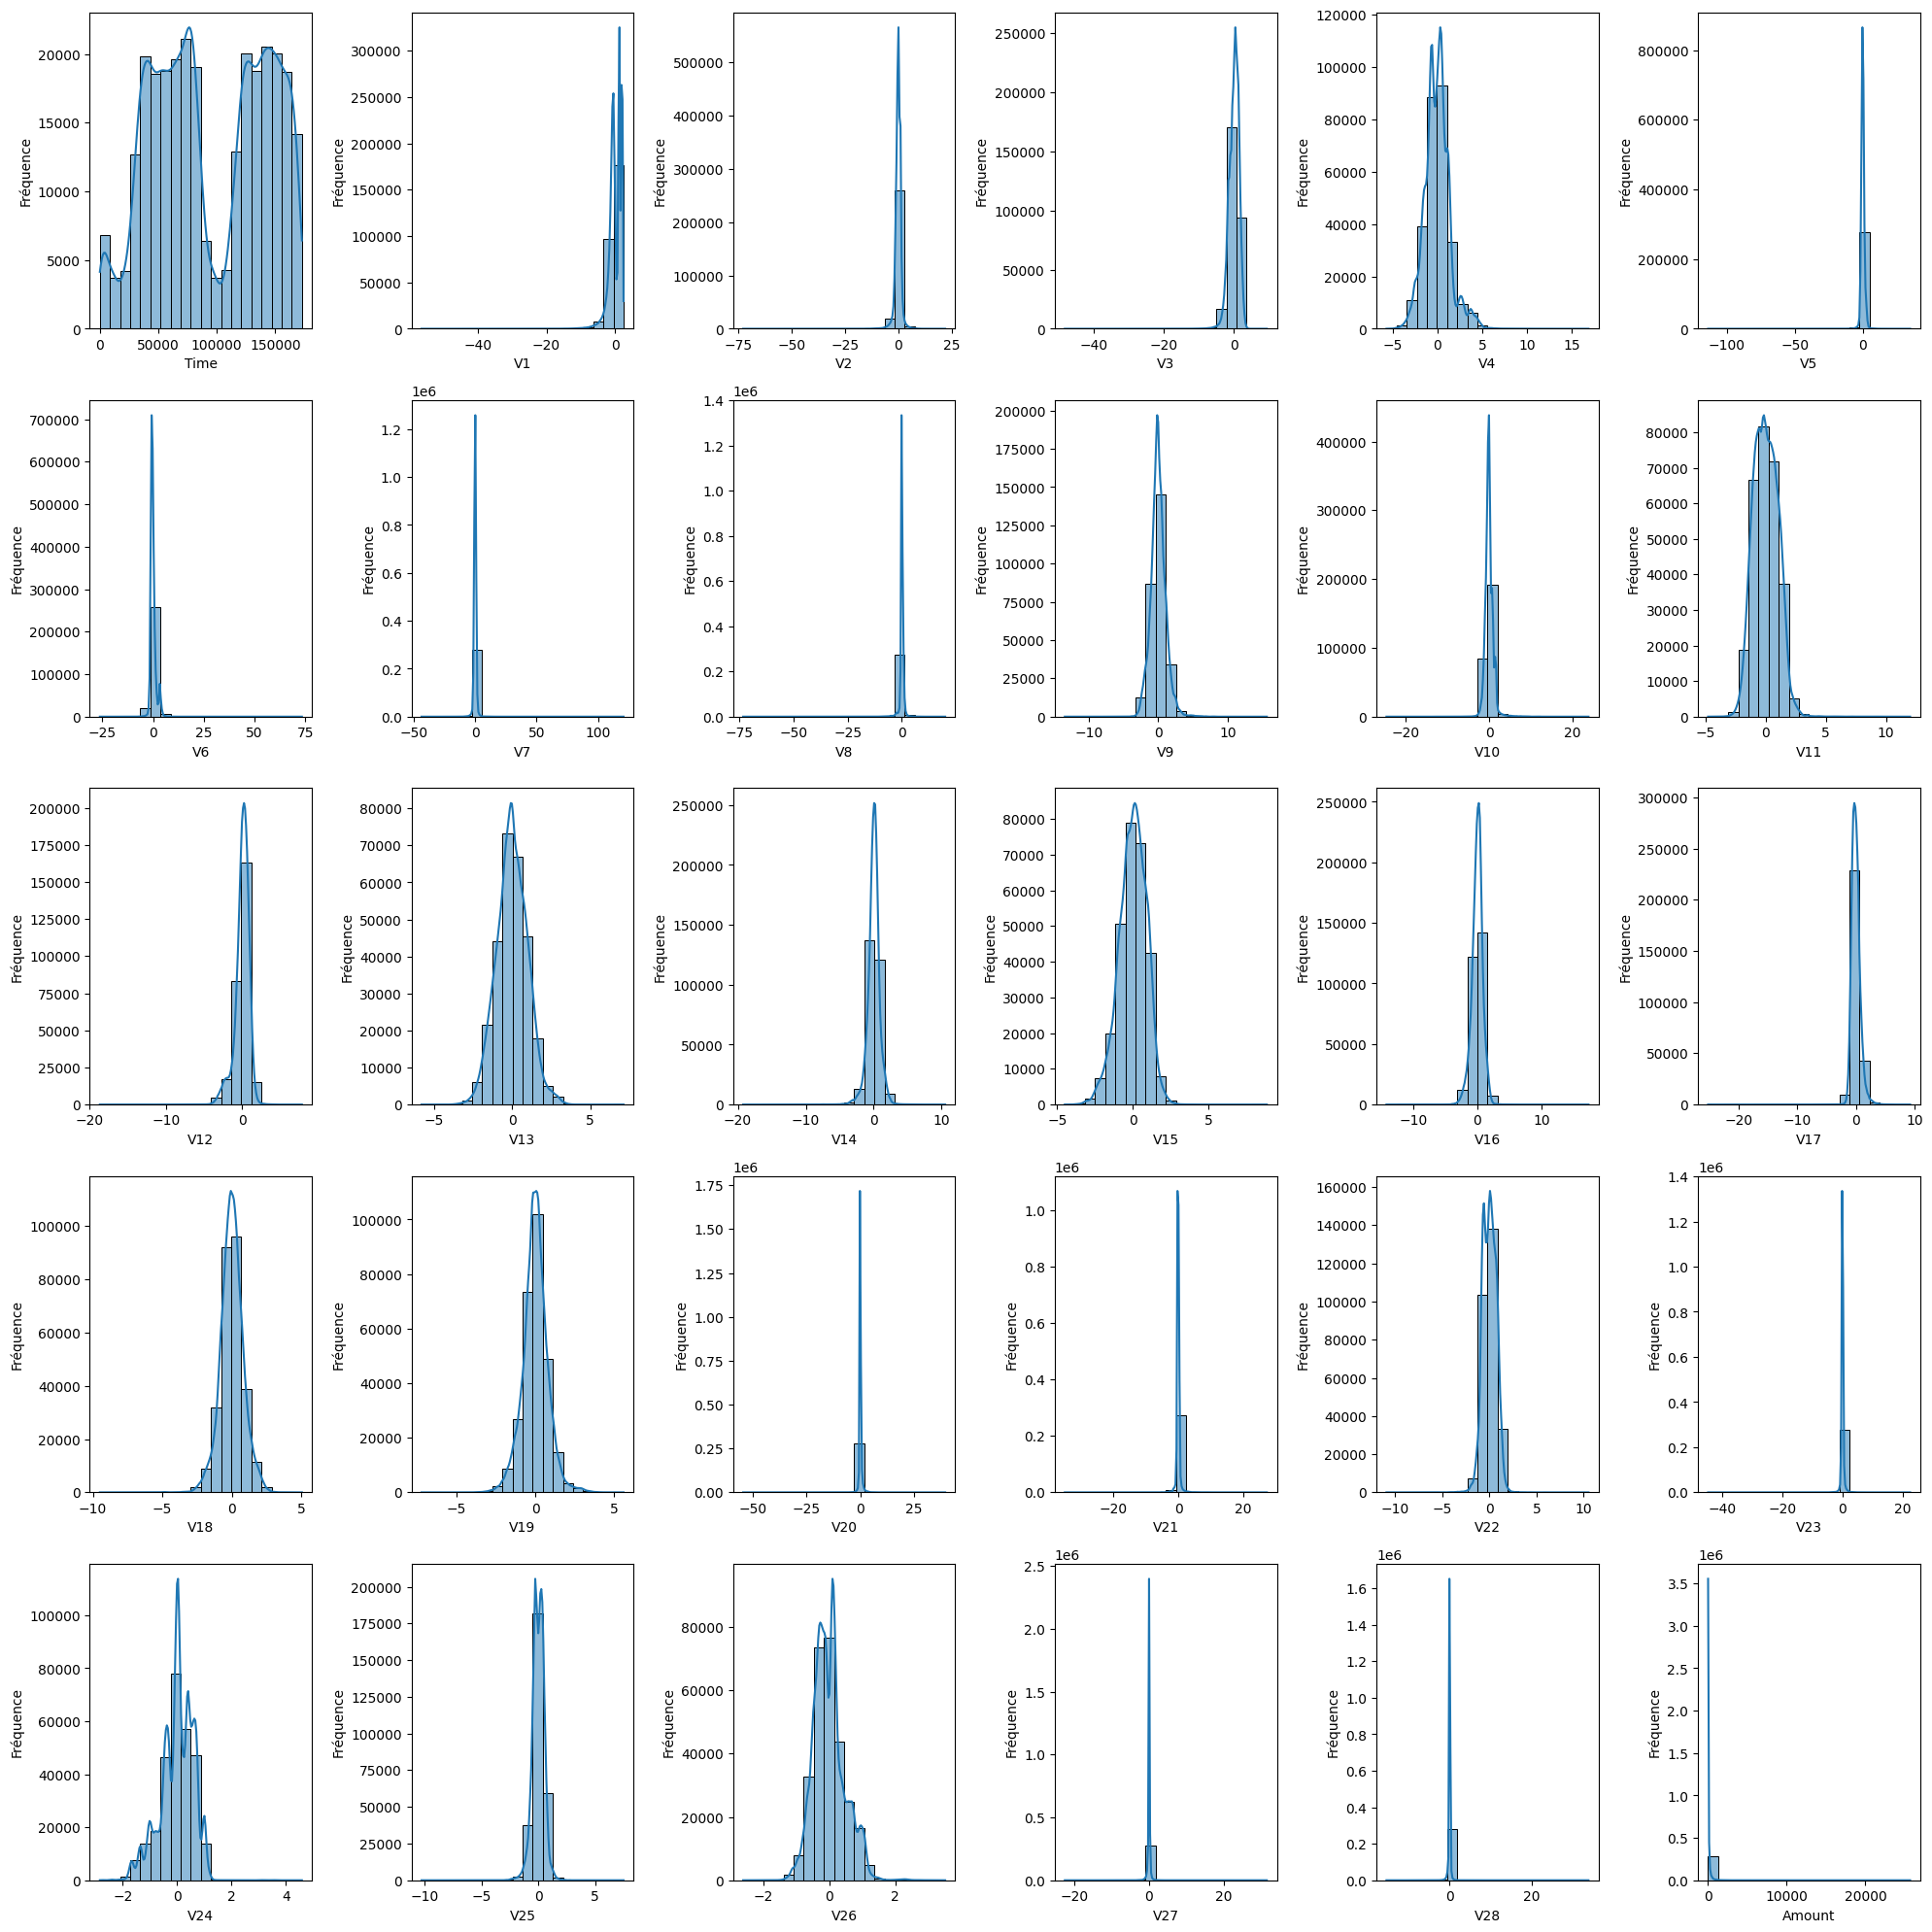

In [ ]:
col = df.columns.drop('Class')
fig, axes = plt.subplots(5, 6, figsize=(20, 20))
i = 0
while i < len(col):
    sns.histplot(df[col[i]], ax=axes[i//6, i%6], bins=20, kde=True)
    axes[i//6, i%6].set_ylabel('Fréquence')
    axes[i//6, i%6].set_xlabel(col[i])
    i += 1
plt.tight_layout()
plt.show()

En résumé, nous avons sur ces différents graphiques des histogrammes avec courbes de densité de probabilités qui permettent d'observer la distribution des variables. Certaines variables présentesnt une courbe de densité symétrique et unimodale, et pour d'autres variables la courbe de densité est asymétrique et multimodale. Dans la suite nous devons différencier les variables qui suivent une loi normale de celles qui ne suivent pas une loi normale et déterminer les outliers. En observant de près les courbes de densité, nous avons l'impréssion qu'aucunes de ces variables ne suit une loi normale, pour en être sur nous allons déterminer pour chacune d'entre elles des caractéristiques telles que le skewness, le kurtosis et ensuite nous allons éffectuer des tests statistiques.

**2.   Skewness et Kurtosis**


Pour les données distribuées normalement, l'asymétrie doit être proche de zéro. Pour les distributions continues unimodales, une valeur d'asymétrie supérieure à zéro signifie qu'il y a plus de poids dans la queue droite de la distribution.

L'asymétrie de l'échantillon est calculée comme le coefficient d'asymétrie de Fisher-Pearson, c'est-à-dire

$$\gamma_1 = \frac{\mu_3}{\mu_2^{3/2}}$$

où :

$$\mu_i = \frac{1}{n} \sum_{k=1}^n (x_k - \bar{x})^i$$

* Si $\gamma_1$ = 0 alors la distribution est symétrique.

* Si $\gamma_1$ > 0 alors la distribution est étalée à droite.

* Si $\gamma_1$ < 0 alors la distribution est étalée à gauche.


**Le kurtosis** est le quatrième moment central divisé par le carré de la variance. Si la définition de Fisher est utilisée, alors 3 est soustrait du résultat pour donner 0 pour une distribution normale.

$$\gamma_2 = \frac{\mu_4}{\mu_2^2}$$

où :

$$\mu_i = \frac{1}{n} \sum_{k=1}^n (x_k - \bar{x})^i$$


* Si $\gamma_2$ = 3, alors la distribution a le même aplatissement que la distribution normale.

* Si $\gamma_2$ > 3, alors elle est moins aplatie que la distribution normale : les observations sont plus concentrées.

* Si $\gamma_2$ < 3, alors les observations sont moins concentrées : la distribution est plus aplatie.



In [ ]:
param = []
for i in col:
  skewness = stats.skew(df[i])
  kurtosis = stats.kurtosis(df[i], fisher=False)
  df_new = {
      'Feature': i,
      'Skewness': skewness,
      'Kurtosis': kurtosis
  }
  param.append(df_new)

df_param = pd.DataFrame(param)

df_param

,Feature,Skewness,Kurtosis
0,Time,-0.035580,1.706569
1,V1,-3.273254,35.726735
2,V2,-4.695137,99.896444
3,V3,-2.151973,28.186065
4,V4,0.671501,5.618712
5,V5,-2.414066,212.273758
6,V6,1.829871,45.838110
7,V7,2.890256,417.134868
8,V8,-8.310926,218.013122
9,V9,0.537660,6.516578


**3. Tests de Shapiro-Wilk et Kolmogorov-Smirnov**

###Test de Shapiro-Wilk

le test de Shapiro–Wilk teste l'hypothèse nulle selon laquelle un échantillon ${\displaystyle x_{1},\dots ,x_{n}}$ est issu d'une population normalement distribuée.

#### Formule :
$$
W = \frac{\left( \sum_{i=1}^n a_i x_{(i)} \right)^2}{\sum_{i=1}^n (x_i - \bar{x})^2}
$$

où :
-  W : statistique de Shapiro-Wilk.
- $x_{(i)}$ : $i-ème$ plus petite valeur (valeurs ordonnées).
- $a_i$ : coefficients basés sur la distribution normale.

Hypothèses :
- **$H_0$** : L'échantillon suit une distribution normale.
- **$H_1$** : L'échantillon ne suit pas une distribution normale.

Interprétation des résultats :
- Si la valeur p est inférieure au seuil de signification $(\alpha = 0.05)$, cela signifie qu'on rejette $H_0$ et on accepte l'hypothèse $H_1$, c'est-à-dire que l'échantillon ne suit pas une loi normale;
- Sinon, on accepte l'hypothèse $H_0$.

---

###Test de Kolmogorov-Smirnov

Le test de Kolmogorov-Smirnov est un test d'hypothèse utilisé pour déterminer si un échantillon suit bien une loi donnée connue par sa fonction de répartition continue, ou bien si deux échantillons suivent la même loi.

#### Formule :
$$D_n = \sup_x \left| F_n(x) - F(x) \right|$$

où :
- $D_n$ : statistique de Kolmogorov-Smirnov.
- $F_n(x)$ : fonction de répartition empirique.
- $F(x)$ : fonction de répartition théorique.

Hypothèses :
- **$H_0$** : L'échantillon suit une distribution normale.
- **$H_1$** : L'échantillon ne suit pas une distribution normale.

Interprétation des résultats :
- Si la valeur p est inférieure au seuil de signification $(\alpha = 0.05)$, cela signifie qu'on rejette $H_0$ et on accepte l'hypothèse $H_1$, c'est-à-dire que l'échantillon ne suit pas une loi normale;
- Sinon, on accepte l'hypothèse $H_0$.


In [ ]:
alpha = 0.05

#utilisons les test de Shapiro-Wilk et Kolmogorov-Smirnov
for i in col:
    stat, p_value = shapiro(df[i])
    ks_stat, ks_p_value = stats.kstest(df[i], 'norm')
    df_param.loc[df_param['Feature'] == i, 'pv-Shapiro-Wilk'] = p_value
    df_param.loc[df_param['Feature'] == i, 'pv-Kolmogorov-Smirnov'] = ks_p_value
    df_param.loc[df_param['Feature'] == i, 'Normalité-Shapiro-Wilk'] = 'Oui' if p_value > alpha else 'Non'
    df_param.loc[df_param['Feature'] == i, 'Normalité-Kolmogorov-Smirnov'] = 'Oui' if ks_p_value > alpha else 'Non'

df_param

,Feature,Skewness,Kurtosis,pv-Shapiro-Wilk,pv-Kolmogorov-Smirnov,Normalité-Shapiro-Wilk,Normalité-Kolmogorov-Smirnov
0,Time,-0.035580,1.706569,8.607054e-119,0.000000e+00,Non,Non
1,V1,-3.273254,35.726735,1.321386e-155,0.000000e+00,Non,Non
2,V2,-4.695137,99.896444,1.741065e-164,0.000000e+00,Non,Non
3,V3,-2.151973,28.186065,4.025560e-130,0.000000e+00,Non,Non
4,V4,0.671501,5.618712,2.133079e-100,0.000000e+00,Non,Non
5,V5,-2.414066,212.273758,2.755804e-151,6.009101e-264,Non,Non
6,V6,1.829871,45.838110,1.536683e-147,0.000000e+00,Non,Non
7,V7,2.890256,417.134868,1.126712e-165,0.000000e+00,Non,Non
8,V8,-8.310926,218.013122,8.284768e-187,0.000000e+00,Non,Non
9,V9,0.537660,6.516578,5.065602e-99,1.663676e-231,Non,Non


Le tableau ci-dessus nous permet de constater qu'aucune de nos variables quantitatives ne suit une loi normale de distribution. Nous avons pour chacune des variables un *skewness* différent de 0 et un *kurtosis* différent de 3, en plus la *p_value* de chacune de ces variables pour le test de Shapiro Wilk tout comme pour le test de Kolmogorov Smirnov est supérieur à 0.05. C'est pour cette raison que nous utiliserons l'Isolation Forest pour déterminer les valeurs aberrantes.

**4.Détection des valeurs aberrantes**

Dans Isolation Forest, on retrouve Isolation car c’est une technique de détection d’anomalies qui identifie directement les anomalies (communément appelées “outliers”) contrairement aux techniques usuelles qui discriminent les points vis-à-vis d’un profil global « normalisé ».

Le principe de cet algorithme est très simple :

- On sélectionne une variable (feature) de façon aléatoire.
- Ensuite on réalise un partitionnement aléatoire du jeu de données selon cette variable de telle sorte à obtenir deux sous-ensembles de données.
- On répète les deux étapes précédentes jusqu’à ce qu’une donnée soit isolée.
- De manière récursive, on répète les étapes précédentes.

De la même manière que les algorithmes ensemblistes tel que le Random Forest, on crée une forêt (d’où le nom d’Isolation Forest) composée de dizaines ou centaines d’arbres dont on va combiner les résultats afin d’obtenir un meilleur résultat.

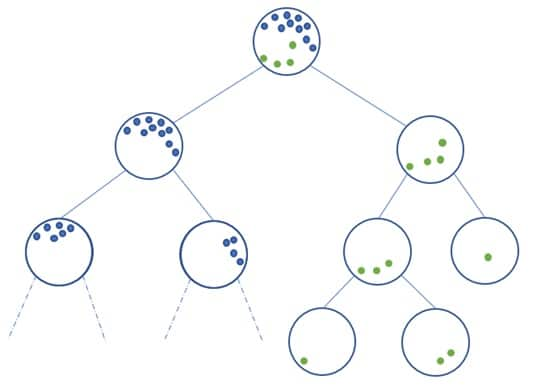

In [ ]:
features = []

for i in col:

    # Isolation Forest pour les distributions non normales
    iso = IsolationForest(contamination=0.05, random_state=42)
    preds = iso.fit_predict(df[[i]])
    outliers = np.where(preds == -1)[0]

    df_new = {
        'Feature': i,
        'Outliers (%)': len(outliers)/df.shape[0]*100,
    }
    features.append(df_new)

df_outliers = pd.DataFrame(features)

print(df_outliers)



   Feature  Outliers (%)
0     Time      4.995312
1       V1      4.998837
2       V2      4.995665
3       V3      4.997427
4       V4      4.994960
5       V5      4.963592
6       V6      4.998837
7       V7      4.992140
8       V8      4.991083
9       V9      4.980509
10     V10      4.980862
11     V11      4.992140
12     V12      4.992493
13     V13      4.991435
14     V14      4.992140
15     V15      4.993903
16     V16      4.988263
17     V17      5.000247
18     V18      4.999542
19     V19      4.980509
20     V20      4.993550
21     V21      4.994960
22     V22      4.985091
23     V23      4.982977
24     V24      4.999542
25     V25      4.992140
26     V26      4.994607
27     V27      4.993198
28     V28      4.988616
29  Amount      4.995665


Les graphiques ci dessous (boxplot) basé sur l'IQR (écart interquartile) nous permettent de visualiser les valeus aberrantes même comme la méthode utilisé ici est l'isolation forest.

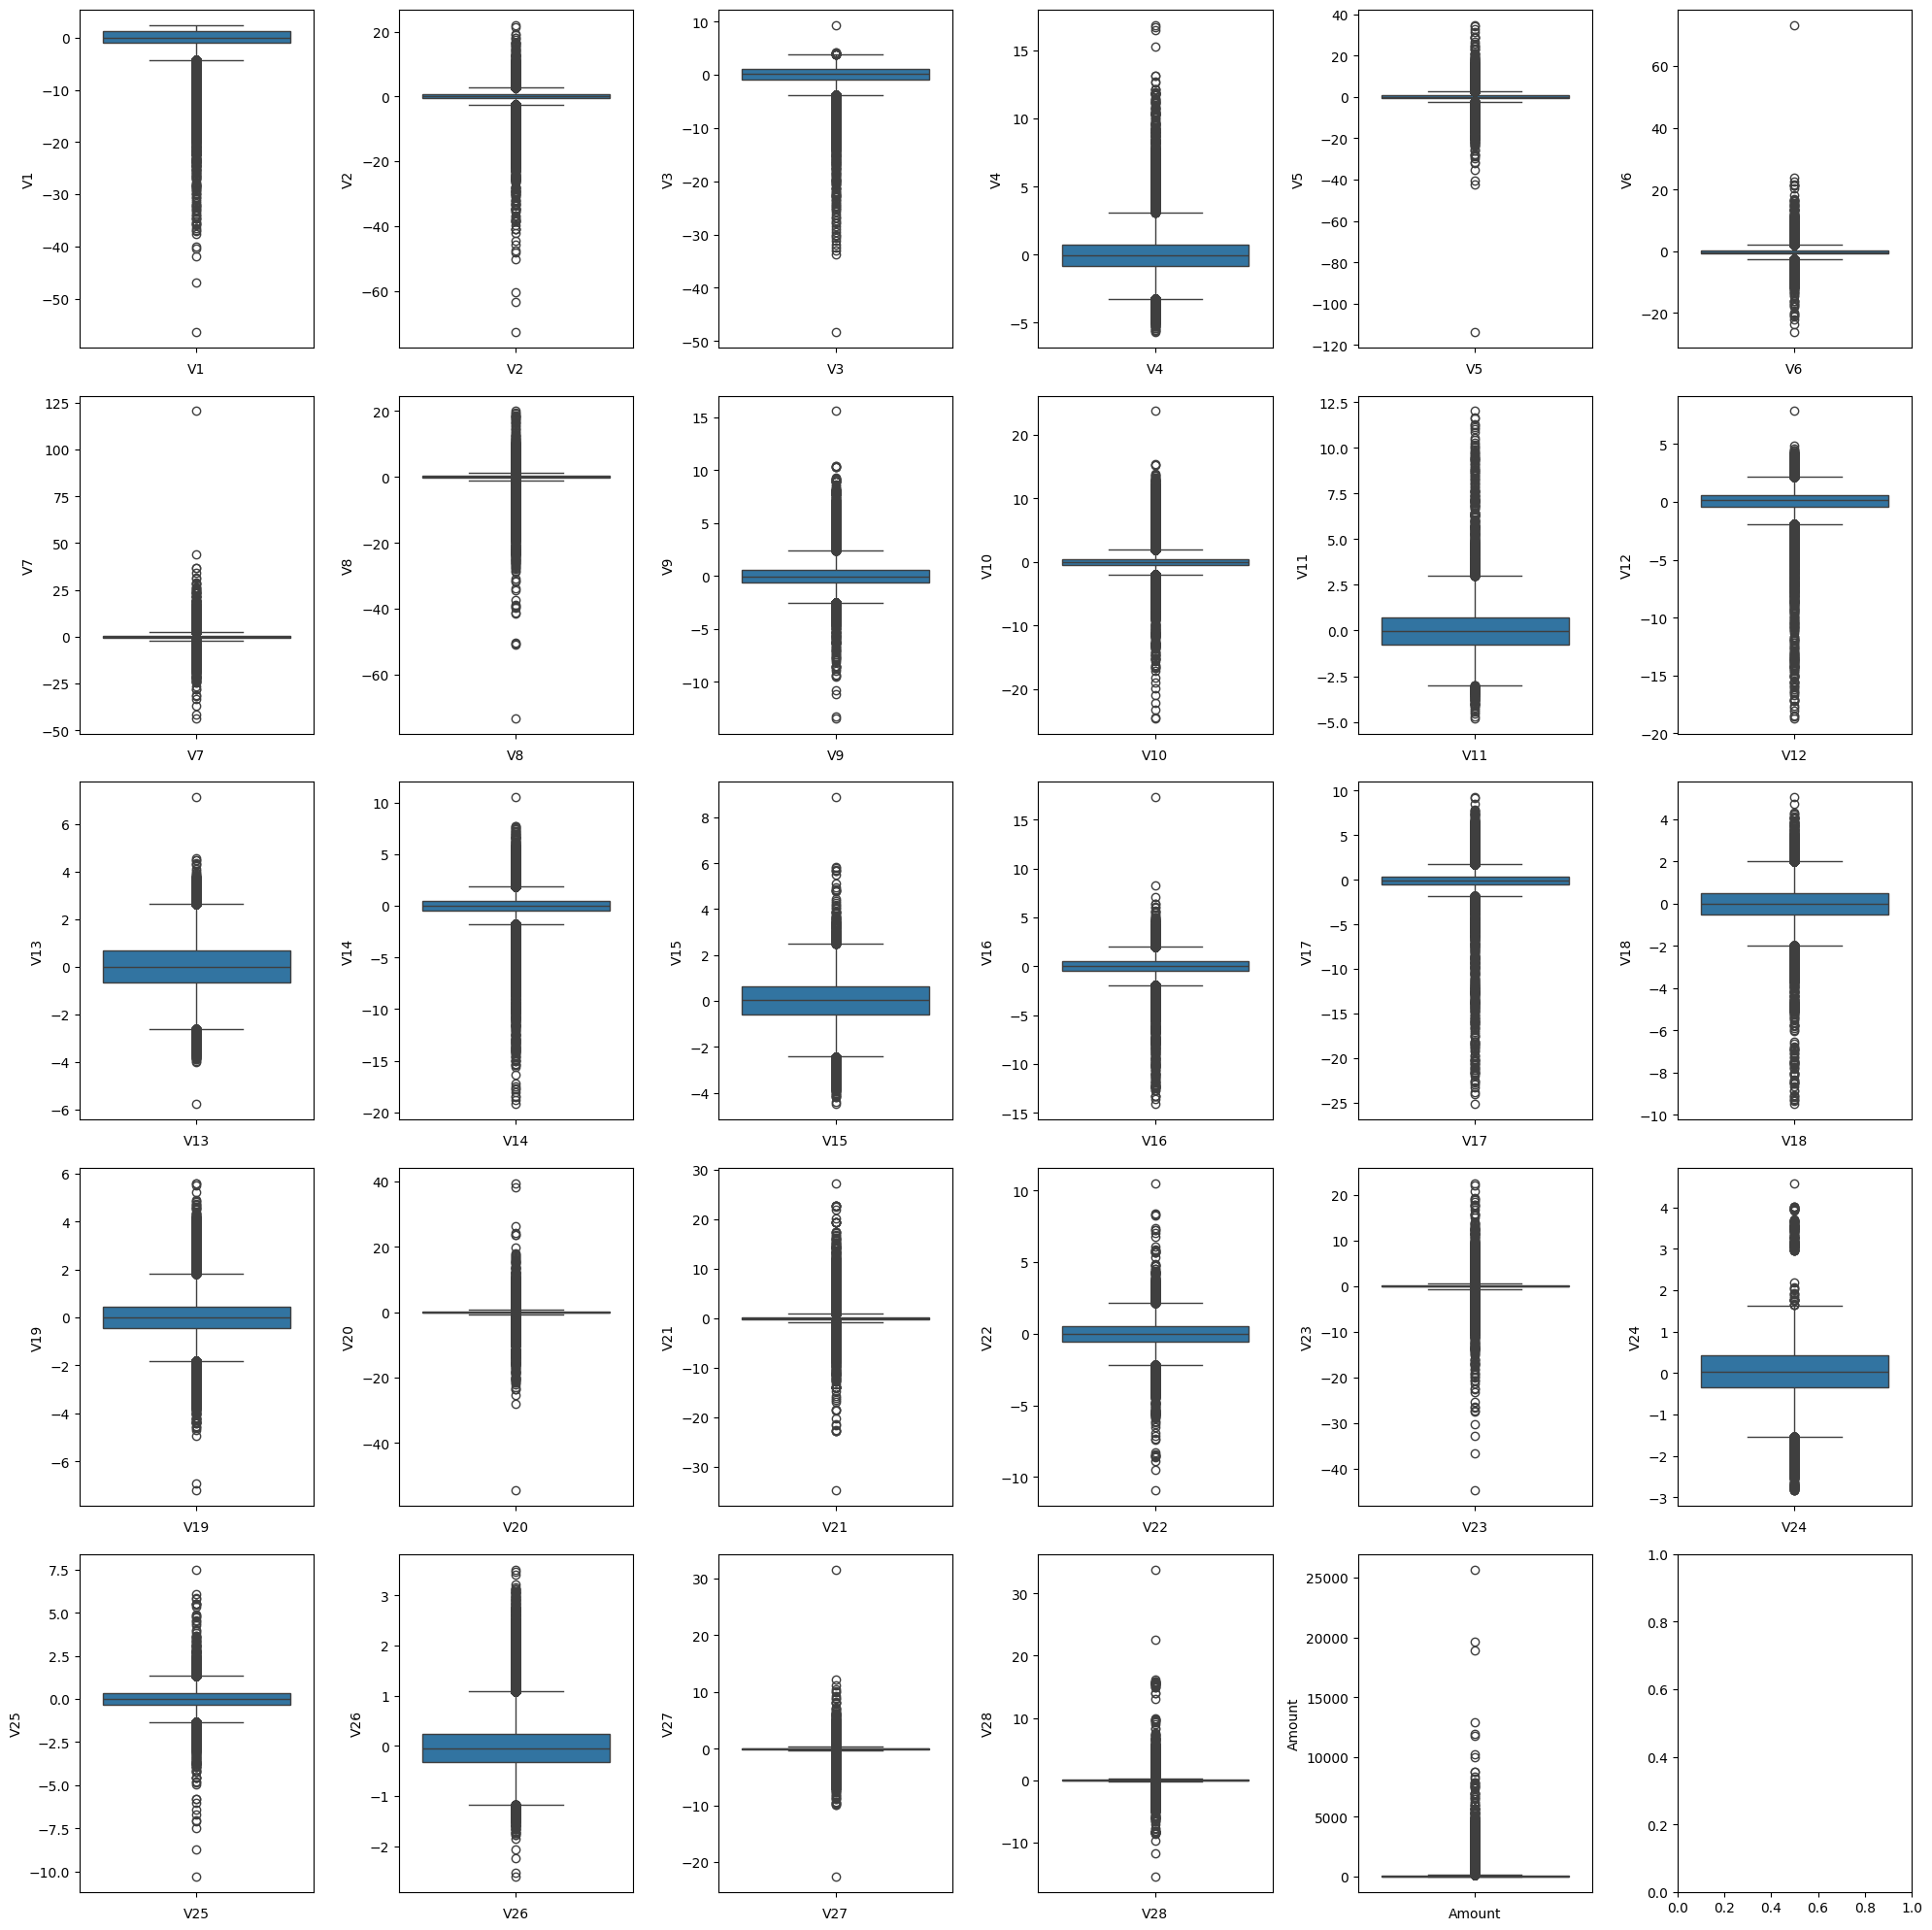

In [ ]:
fig, axes = plt.subplots(5, 6, figsize=(20, 20))
i = 0
while i < len(col):
    sns.boxplot(data=df, y=col[i], ax=axes[i//6, i%6])
    axes[i//6, i%6].set_xlabel(col[i])
    i += 1
plt.tight_layout()
plt.show()

Comme vous pouvez le constater nous avons des valeurs aberrantes pour chacune de ces classes, nous allons maintenant transformer les variables pour revenir à une distribution qui se rapproche d'une distribution symétrique. Pour celà nous allons discrétiser la variable time et appliquer une transformation logartihmique sur le reste des variables quantitatives.

La discrétisation désigne le procédé qui consiste à transformer une variable quantitative en une variable qualitative. Pour cela, la variable quantitative est découpée en intervalles (classes) qui deviennent désormais les modalités de la variable qualitative

In [ ]:
bins = [0, 6, 9, 12, 18, 21, 24]
labels = ['Nuit', 'Tôt le matin', 'Matinée', 'Après-midi', 'Soirée', 'Nuit tardive']

df_log = df.copy()

df_log['Time_categ'] = pd.cut((df_log['Time']/3600) % 24, bins=bins, labels=labels, right=False)

print(df_log[['Time', 'Time_categ']].head())

   Time Time_categ
0   0.0       Nuit
1   0.0       Nuit
2   1.0       Nuit
3   1.0       Nuit
4   2.0       Nuit


### Transformation Log-Modulus

La transformation Log-Modulus est utilisée pour gérer les valeurs aberrantes et traiter les données contenant des valeurs négatives tout en appliquant une transformation logarithmique. Elle est définie comme suit :

#### Formule :
$$f(x) = \text{sign}(x) \cdot \log(1 + |x|)$$

où :  
- $f(x)$ : valeur transformée.  
- $x$ : valeur d'origine.  
- $\text{sign}(x)$ : fonction signe de $x$, qui vaut $1$ si $x > 0$, $-1$ si $x < 0$ et $0$ si $x = 0$.

#### Caractéristiques :
1. Gère les valeurs positives et négatives grâce à la fonction $\text{sign}(x)$.  
2. Réduit l'effet des valeurs extrêmes (outliers).  
3. Ne nécessite pas d'ajustement préalable des données négatives, contrairement à la transformation logarithmique classique.

#### Exemple d'interprétation :
- Les valeurs proches de $0$ restent similaires après transformation, car $f(0) = 0$.  
- Les grandes valeurs absolues, qu'elles soient positives ou négatives, sont compressées, réduisant leur impact.

#### Cas d'utilisation :
- La transformation Log-Modulus est particulièrement utile lorsque les données contiennent des valeurs aberrantes (outliers) importantes et des valeurs négatives qui empêchent l'utilisation directe d'une transformation logarithmique classique.




In [ ]:
col2 = col.drop('Time')
for i in col2:
  df_log[i] = df[i].apply(lambda x: np.sign(x) * np.log(np.abs(x) + 1))
df_log.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_categ
0,0.0,-0.858580,-0.070255,1.263094,0.866325,-0.291416,0.380071,0.214788,0.094126,0.310265,...,0.245169,-0.104787,0.064784,0.120924,-0.173209,0.125362,-0.020835,5.014760,0,Nuit
1,0.0,0.784749,0.235981,0.153991,0.370290,0.058286,-0.079145,-0.075852,0.081674,-0.227474,...,-0.493886,0.096480,-0.292555,0.154582,0.118578,-0.008943,0.014617,1.305626,0,Nuit
2,1.0,-0.857964,-0.850221,1.020005,0.321924,-0.407595,1.029798,0.583031,0.221282,-0.922135,...,0.571928,0.646795,-0.524303,-0.283404,-0.130235,-0.053875,-0.058035,5.939276,0,Nuit
3,1.0,-0.676139,-0.169933,1.027114,-0.622344,-0.010256,0.809686,0.213181,0.320224,-0.870047,...,0.005260,-0.174223,-0.777293,0.499184,-0.200431,0.060834,0.059643,4.824306,0,Nuit
4,2.0,-0.769290,0.630067,0.935590,0.338637,-0.341597,0.091596,0.465582,-0.239436,0.597594,...,0.586830,-0.128796,0.132139,-0.187317,0.406992,0.198377,0.194870,4.262539,0,Nuit


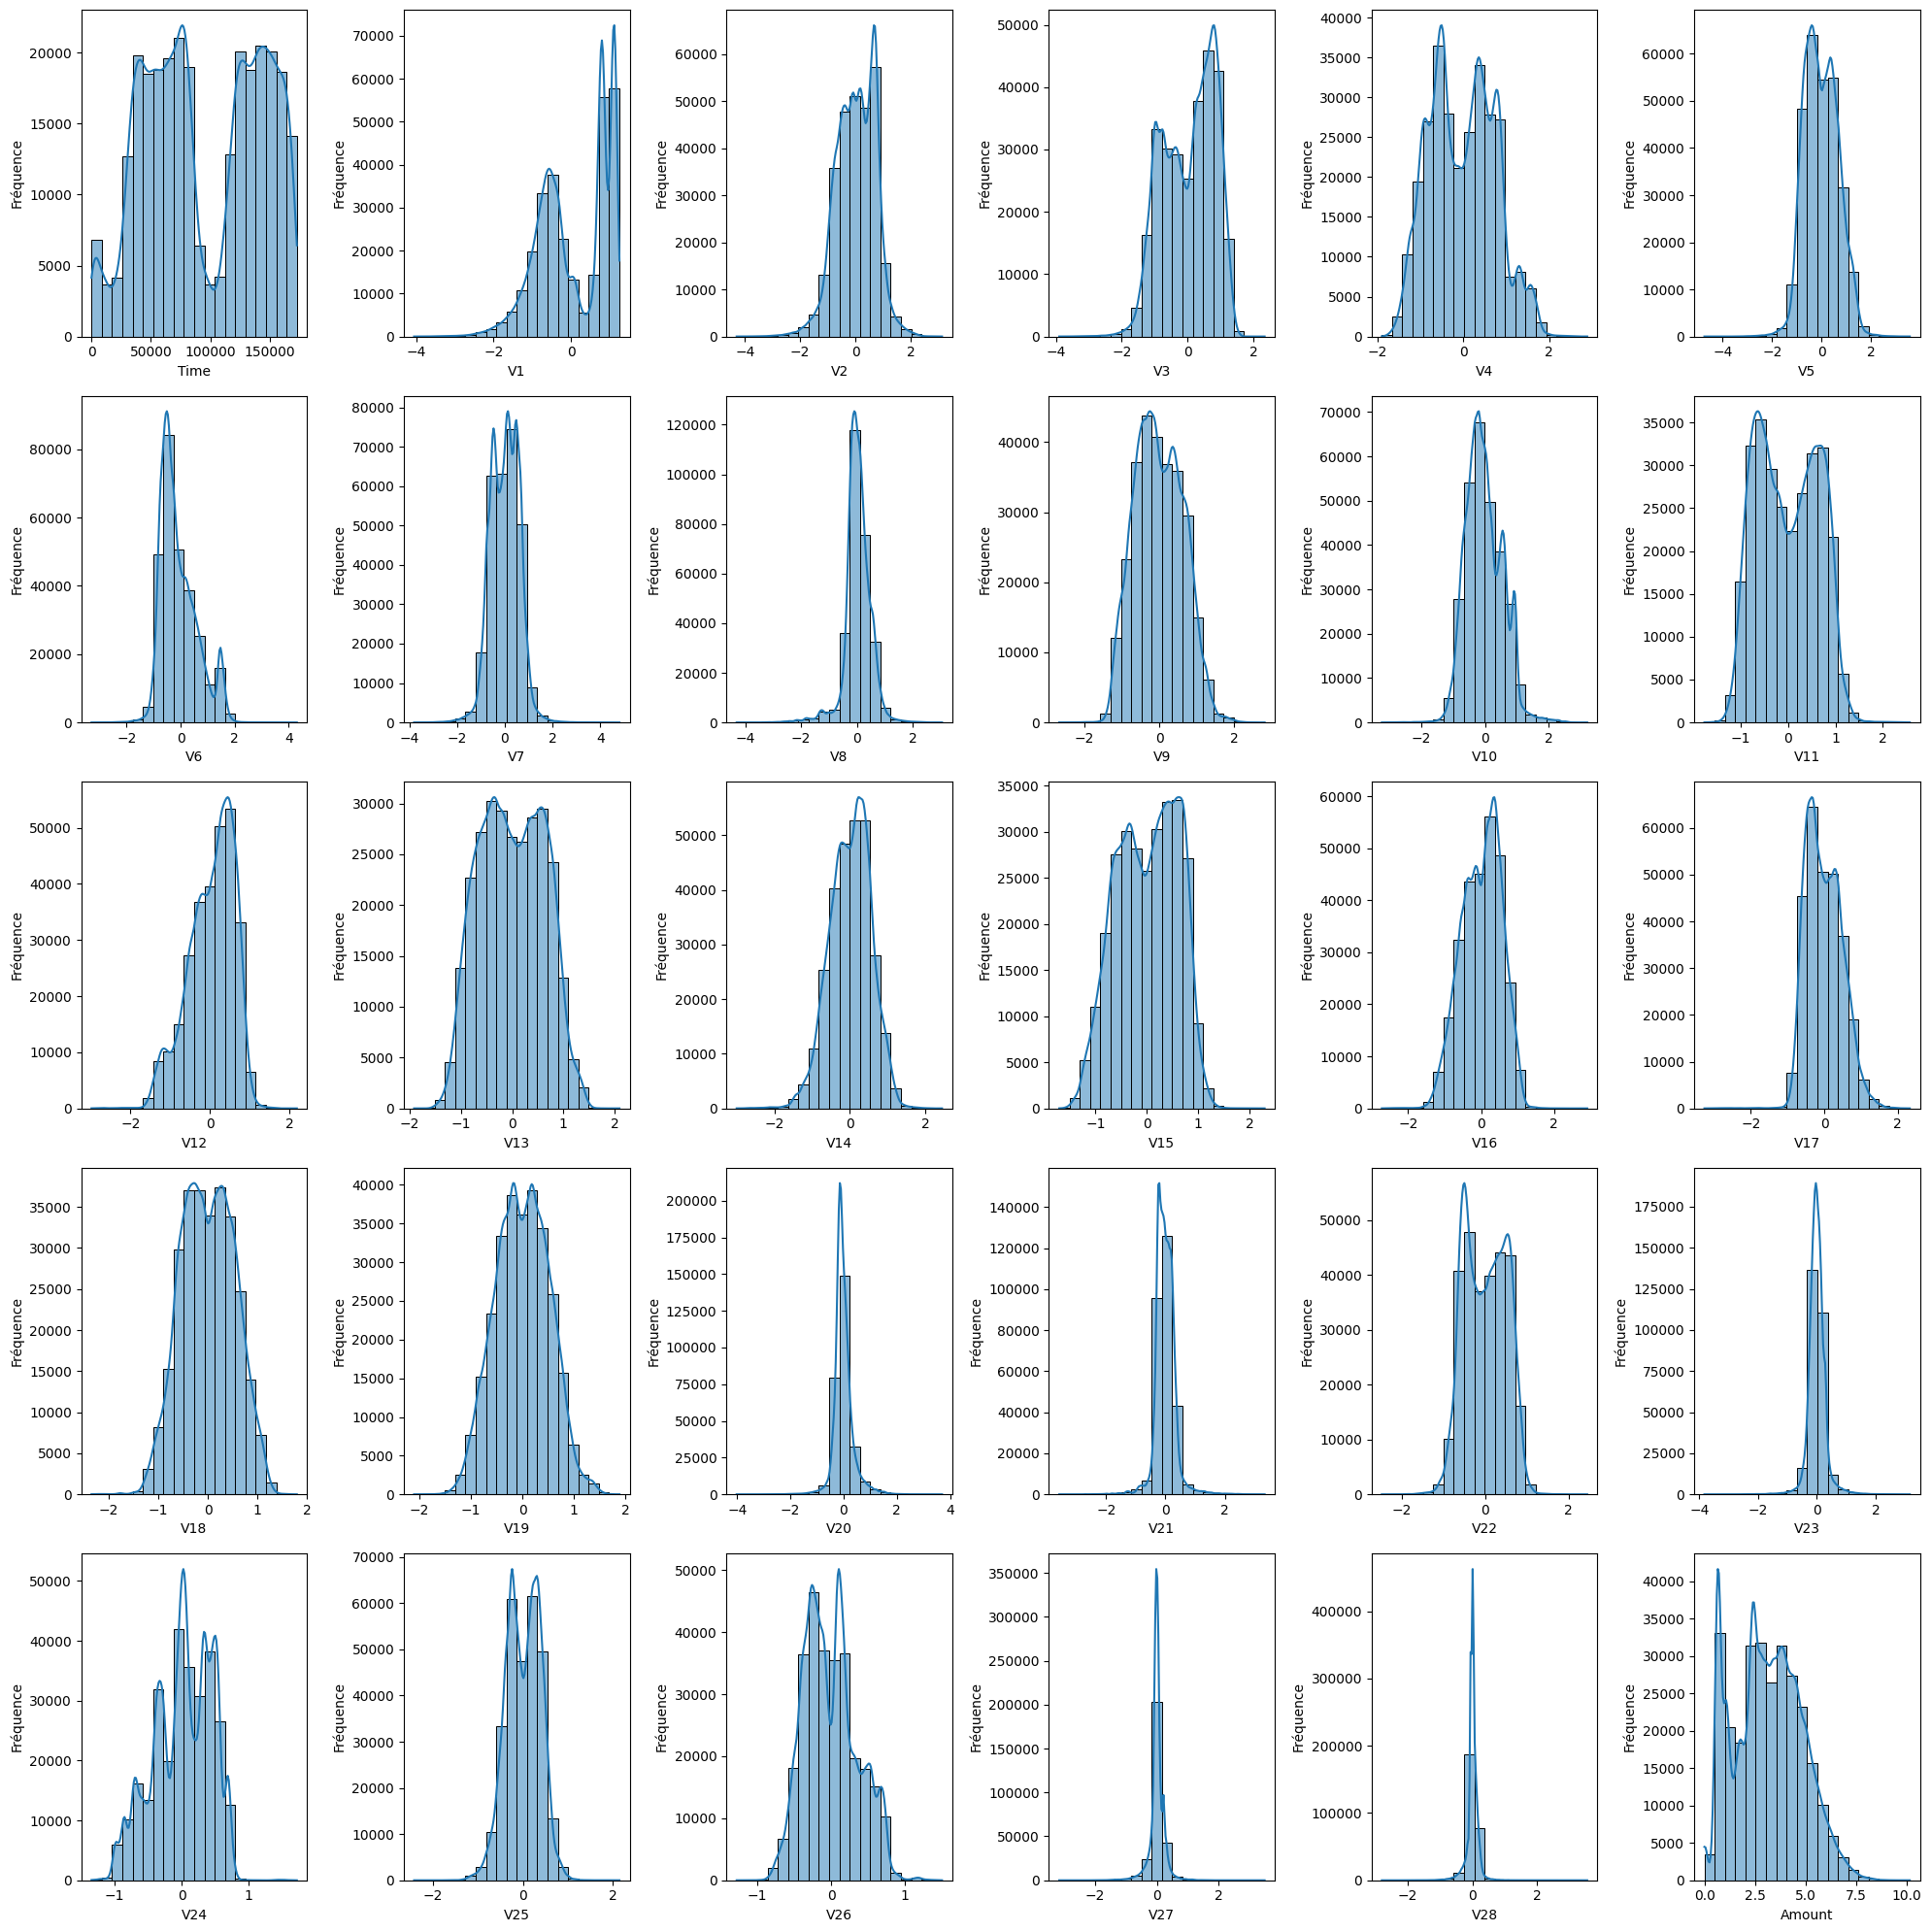

In [ ]:
fig, axes = plt.subplots(5, 6, figsize=(20, 20))
i = 0
while i < len(col):
    sns.histplot(df_log[col[i]], ax=axes[i//6, i%6], bins=20, kde=True)
    axes[i//6, i%6].set_ylabel('Fréquence')
    axes[i//6, i%6].set_xlabel(col[i])
    i += 1
plt.tight_layout()
plt.show()

In [ ]:
df_log.drop('Time', axis=1, inplace=True)

**3.2 Statistiques descriptives bivariées**

**3.2.1 Corrélation entre les variables quantitative**

Vu qu'aucune de nos variables quantitative ne suit une loi normale, nous allons utiliés la méthode de spearman pour construire notre matrice de corrélation.

La corrélation de Spearman est étudiée lorsque deux variables statistiques semblent corrélées sans que la relation entre les deux variables soit de type affine. Elle consiste à trouver un coefficient de corrélation, non pas entre les valeurs prises par les deux variables mais entre les rangs de ces valeurs. Elle estime à quel point la relation entre deux variables peut être décrite par une fonction monotone. S'il n'y a pas de données répétées, une corrélation de Spearman parfaite de +1 ou -1 est obtenue quand l'une des variables est une fonction monotone parfaite de l'autre.

$$r_s = \frac{\text{cov}(R_X, R_Y)}{\sigma_{R_X} \sigma_{R_Y}}$$
où:
- $r_s$ : Coefficient de corrélation de Spearman.
- $R_X$ et $R_Y$ : Les rangs des deux variables $X$ et $Y$.
- $\text{cov}(R_X, R_Y)$ : La covariance entre les rangs des deux variables.
- $\sigma_{R_X}$ et $\sigma_{R_Y}$ : Les écarts-types des rangs des deux variables.
  


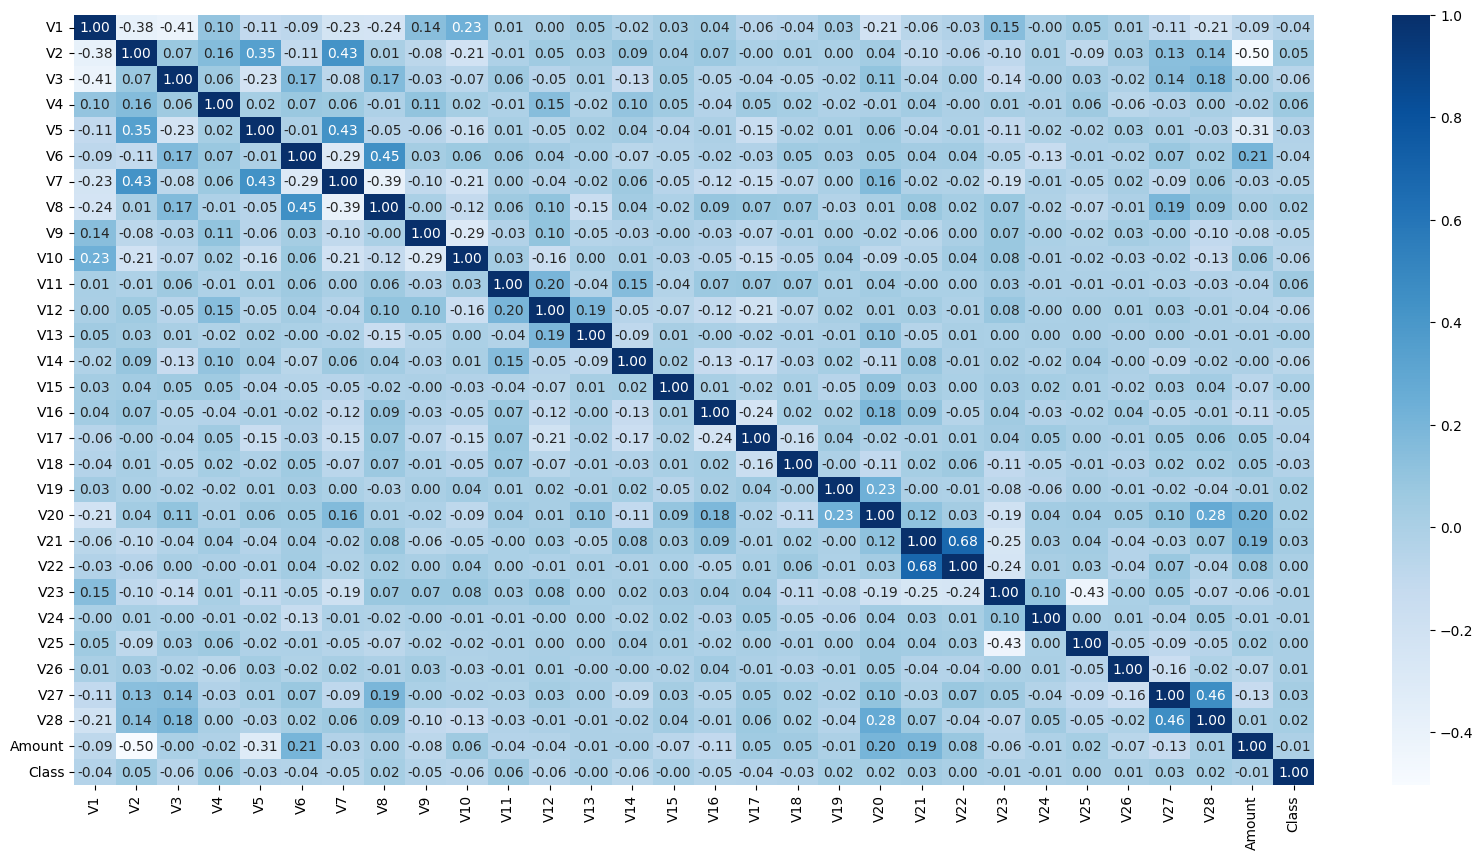

In [ ]:
col = df_log.columns.drop(['Time_categ'])
matrice = df_log[col].corr(method="spearman")
plt.figure(figsize=(20,10))
sns.heatmap(matrice, annot=True,fmt=".2f",cmap="Blues")
plt.show()

Sur la matrice de corrélation, nous remarquons qu'aucune variable n'est fortement corrélée avec la variable Class, mais plus tard nous allons vérifier si elles sont quand même significatives. Néanmoins, on constate une corrélation positive de 0,68 entre V21 et V22, et une corrélation négative entre Amount et V2, observons cela sur un nuage de points.

Text(0.5, 1.0, 'Nuage de points entre Amount et V2')

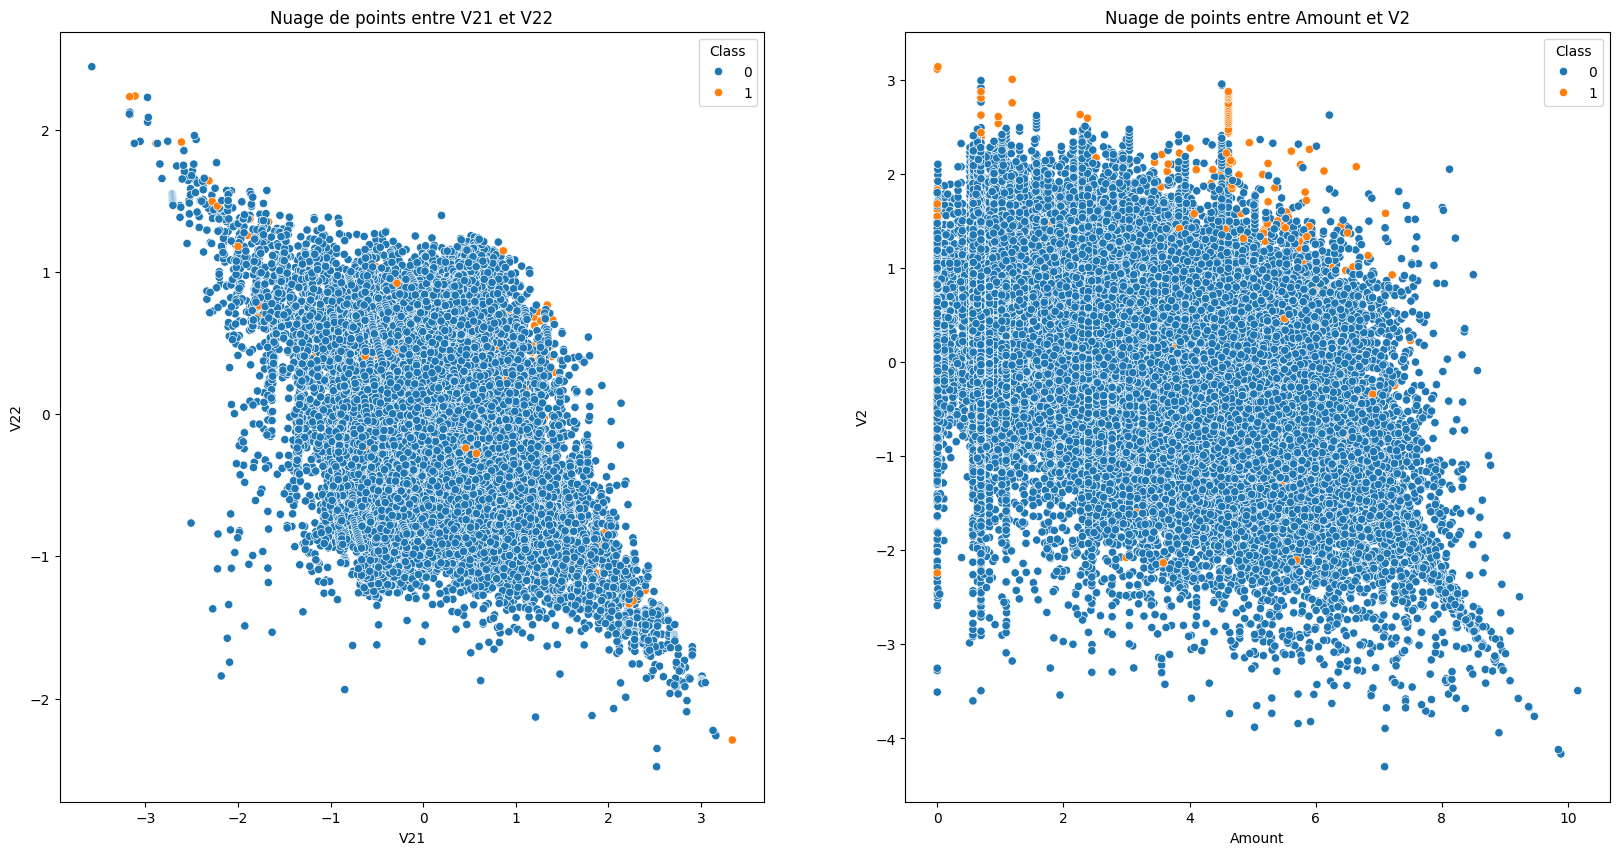

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.scatterplot(data=df_log, x='V21', y='V22', ax=axes[0], hue='Class')
axes[0].set_title('Nuage de points entre V21 et V22')
sns.scatterplot(data=df_log, x='Amount', y='V2', ax=axes[1], hue='Class')
axes[1].set_title('Nuage de points entre Amount et V2')

Les deux graphiques à nuage de points nous montrent des tendances négatives tandis que le coefficient de corrélation entre les deux variables V21 et V22 est de 0,68, toutefois n'oublions pas que la corrélation de Spearman décrit l'intensité de la relation monotone entre deux variables quantitatives.

Nous allons utiliser le test de Shapiro pour vérifier si nos variables suivent une loi normale en fonction des différentes classes

**3.2.2 Association entre les variables quantitatives et qualitatives**

In [ ]:
#appliquer le test de Shapiro pour chacune des variables
dict_list=[]
alpha=0.05
col = df_log.columns.drop(['Time_categ', 'Class'])
for i in col:
    normale = df_log[df_log['Class'] == 0][i]
    fraude = df_log[df_log['Class'] == 1][i]
    _, normale_p_value = shapiro(normale)
    _, fraude_p_value = shapiro(fraude)
    df_new = {
        'Feature': i,
        'Normale': normale_p_value,
        'Fraude': fraude_p_value,
        'Normalité_Normale': 'Oui' if normale_p_value > alpha else 'Non',
        'Normalité_Fraude': 'Oui' if fraude_p_value > alpha else 'Non'
    }
    dict_list.append(df_new)

df_dist = pd.DataFrame(dict_list)

df_dist

,Feature,Normale,Fraude,Normalité_Normale,Normalité_Fraude
0,V1,1.198585e-129,4.199290e-08,Non,Non
1,V2,2.981251e-76,7.229740e-13,Non,Non
2,V3,2.207993e-107,6.192882e-09,Non,Non
3,V4,2.763185e-87,2.274957e-12,Non,Non
4,V5,1.564721e-69,1.889257e-05,Non,Non
5,V6,1.329393e-119,3.896931e-14,Non,Non
6,V7,8.501535e-72,1.065837e-06,Non,Non
7,V8,1.586067e-127,4.325017e-08,Non,Non
8,V9,1.770639e-74,1.580228e-09,Non,Non
9,V10,3.428664e-85,7.974249e-14,Non,Non


Nous remarquons qu'aucune de nos variables ne suit une loi normale, c'est pourquoi, dans la suite, nous utiliserons le test de Mann-Withney U pour déterminer si chacune de nos variables quantitatives est liée avec la variable Class.

### Test de Mann-Whitney U

Le test de Mann–Whitney U est un test non paramétrique utilisé pour comparer deux échantillons indépendants et déterminer s'ils proviennent de la même population.

#### Formule de U :
$$U = n_1 n_2 + \frac{n_1 (n_1 + 1)}{2} - R_1$$

où :  
- $U$ : statistique de Mann-Whitney.  
- $n_1$, $n_2$ : tailles des deux échantillons.  
- $R_1$ : somme des rangs pour le premier échantillon.

#### Hypothèses :
- $H_0$ : Les deux échantillons proviennent de la même population (pas de différence significative).  
- $H_1$ : Les deux échantillons ne proviennent pas de la même population.

#### Interprétation des résultats :
- Si la **valeur p** est inférieure au seuil de signification ($\alpha = 0.05$), on **rejette $H_0$**, c'est-à-dire qu'il existe une différence significative entre les deux échantillons.  
- Sinon, on accepte $H_0$, et on conclut que les échantillons proviennent de la même population.




In [ ]:
man_whitney = []
for i in col:
    stat, p_value = stats.mannwhitneyu(df_log[df_log['Class'] == 0][i], df_log[df_log['Class'] == 1][i])
    df_new = {
        'Feature': i,
        'p_value': p_value,
        'stat': stat,
        'Significativité': 'Oui' if p_value < 0.05 else 'Non'
    }
    man_whitney.append(df_new)

df_mw = pd.DataFrame(man_whitney)
df_mw

,Feature,p_value,stat,Significativité
0,V1,2.570801e-105,105781183.0,Oui
1,V2,8.274562e-153,20123145.0,Oui
2,V3,8.738656e-208,121738405.0,Oui
3,V4,1.599221e-236,8540423.0,Oui
4,V5,2.830042e-51,93799109.0,Oui
5,V6,5.344062e-91,102994988.0,Oui
6,V7,6.513087e-136,111151906.0,Oui
7,V8,2.368820e-34,45236121.0,Oui
8,V9,1.483634e-145,112714371.0,Oui
9,V10,9.598036e-210,121998541.0,Oui


- **Significativité** : Les caractéristiques dont la valeur p est inférieure à 0.05 sont considérées comme statistiquement significatives, ce qui signifie qu'elles ont une influence probable sur la fraude bancaire. Dans ce cas, les caractéristiques avec des valeurs p très faibles (par exemple, V1, V2, V3, etc.) sont toutes significatives.
  
- **Non-significatives** : Les caractéristiques dont la valeur p est supérieure à 0.05, comme V13, V15, et V22, ne montrent pas de lien significatif avec la fraude bancaire, ce qui indique qu'elles n'ont pas une influence notable sur la variable cible dans ce contexte.

## Corrélation entre V21 et V22

Il est important de mentionner qu'auparavant, dans l'analyse de la **matrice de corrélation**, une forte corrélation a été observée entre les caractéristiques **V21** et **V22**. Cela pourrait suggérer une redondance entre ces deux variables. Cependant, bien que **V21** ait montré une significativité statistique, **V22** n'a pas été significative (p-value supérieure à 0.05). Cette redondance pourrait expliquer pourquoi **V22** n'a pas été détectée comme influente dans le test de significativité, malgré sa corrélation avec **V21**.


**3.2.2 Association entre deux variables qualitatives**

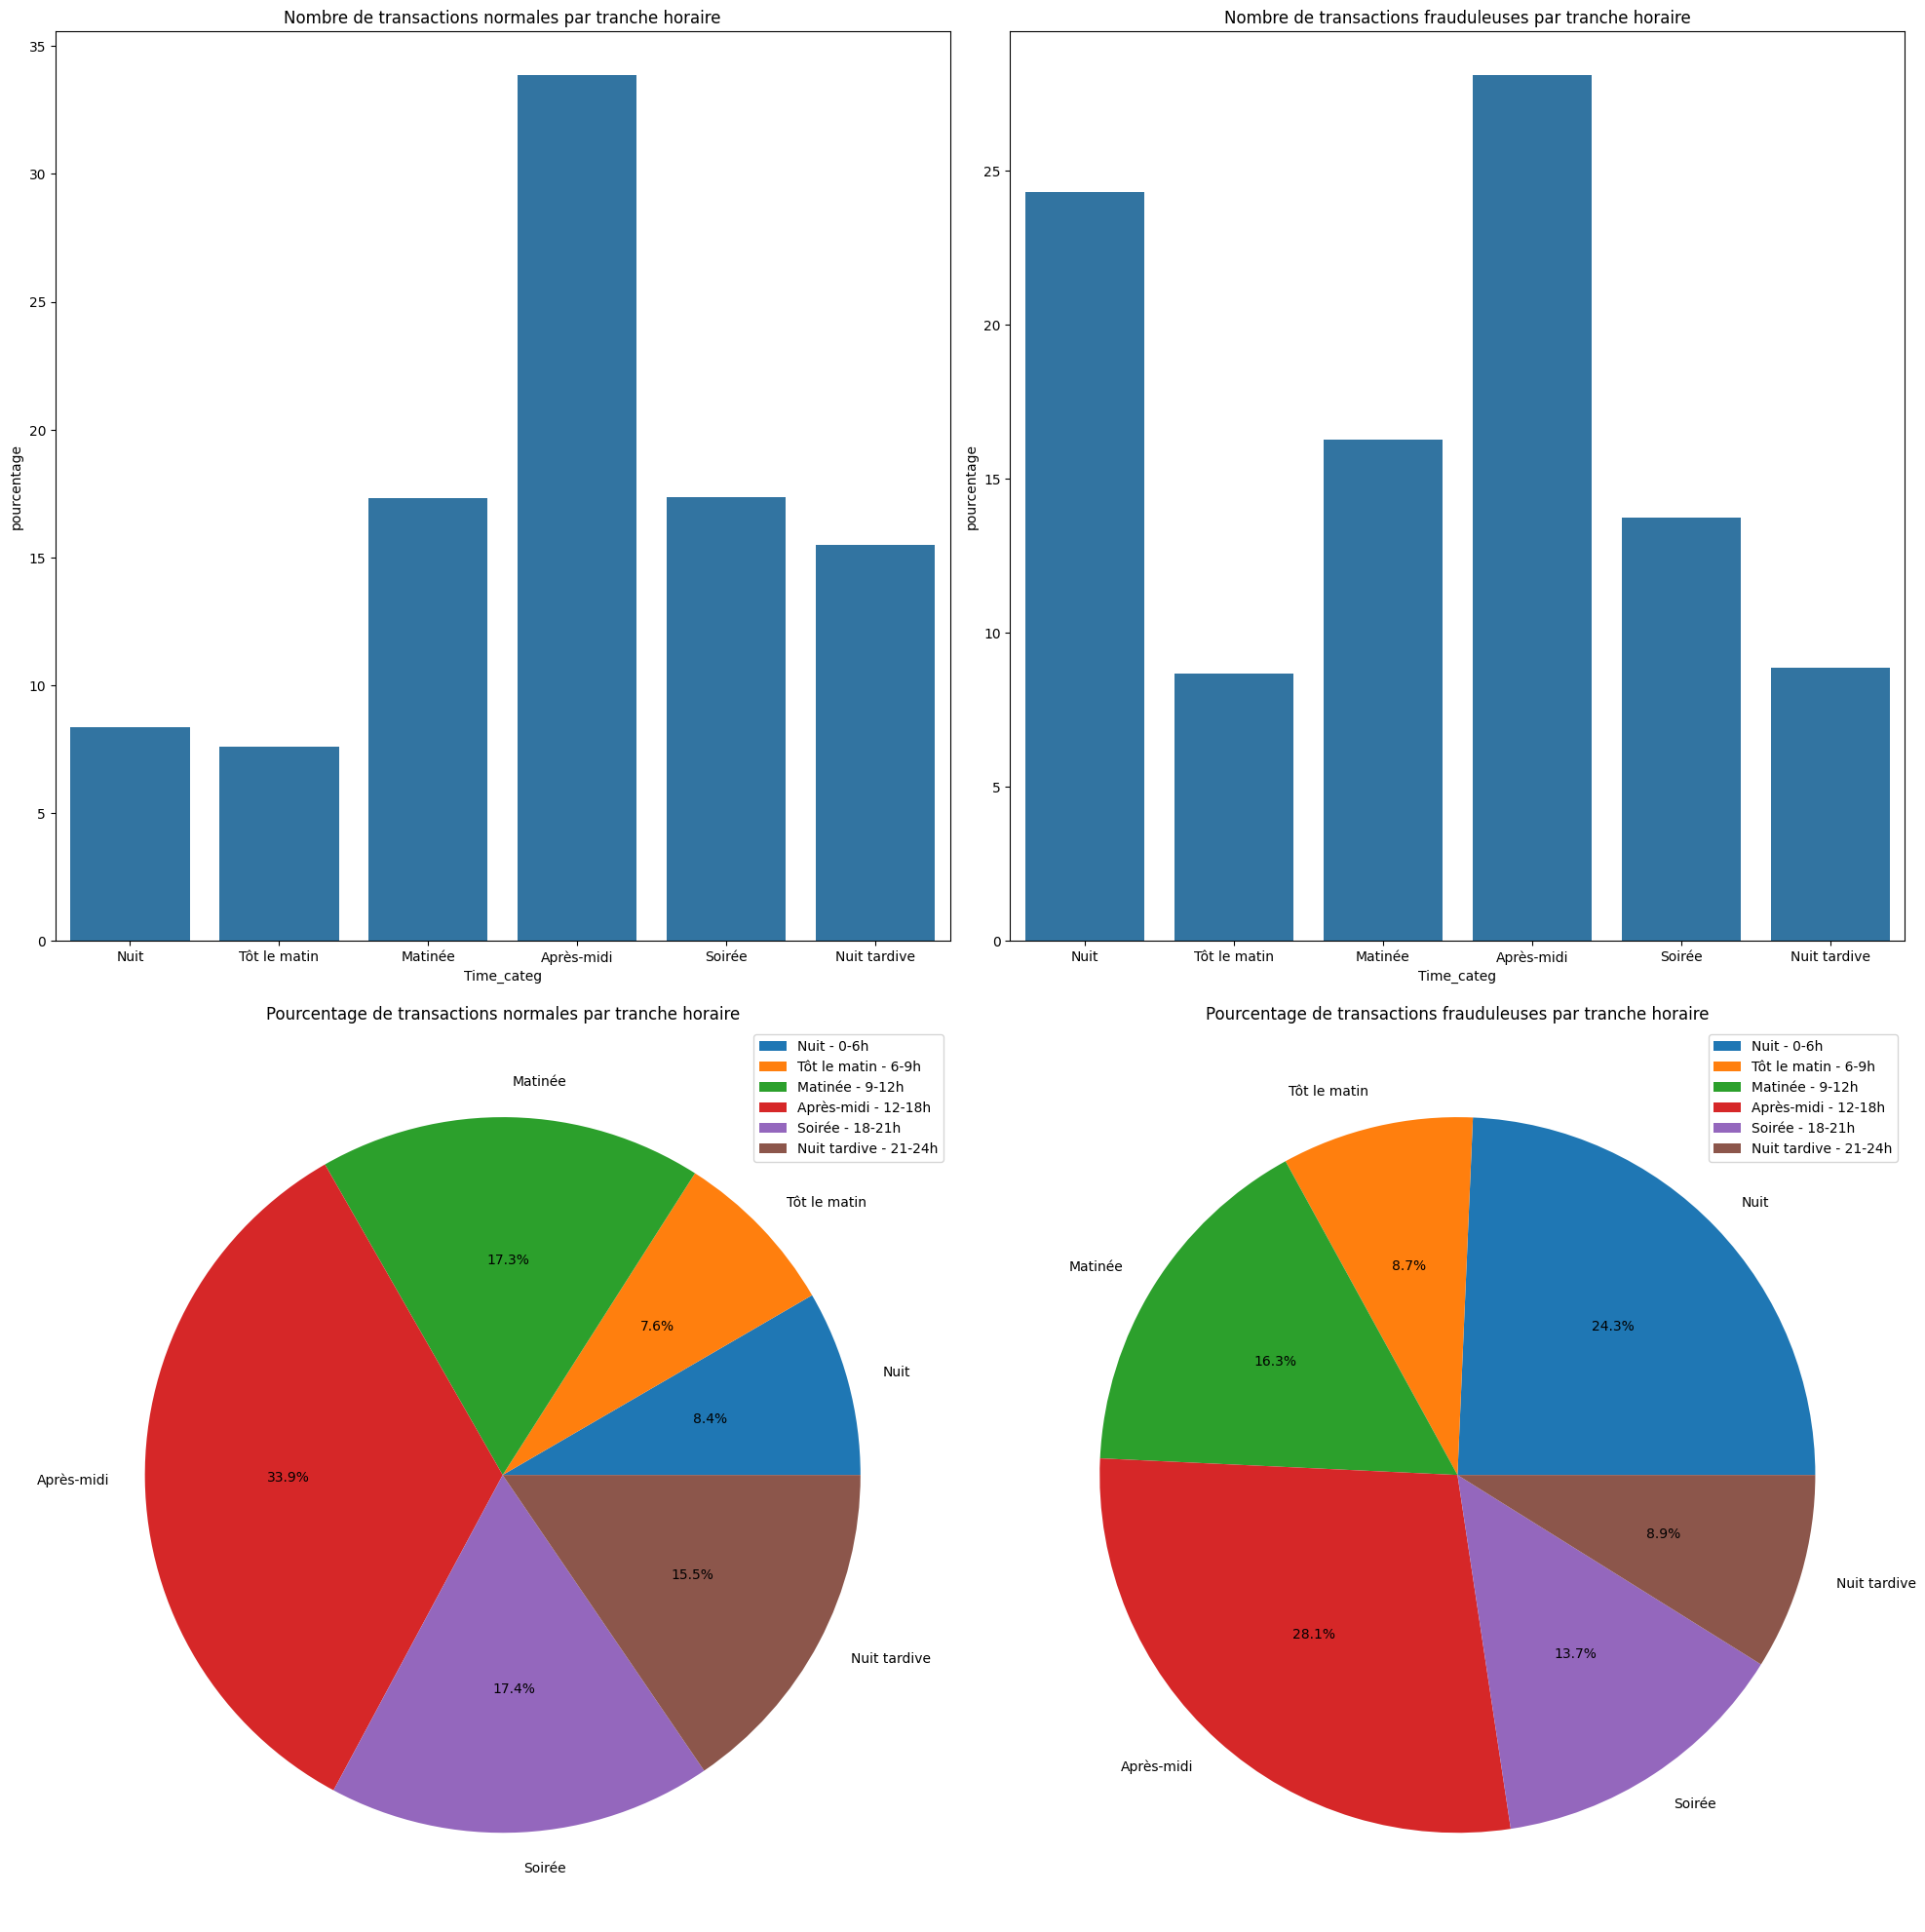

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
lab = ['Nuit - 0-6h', 'Tôt le matin - 6-9h', 'Matinée - 9-12h', 'Après-midi - 12-18h', 'Soirée - 18-21h', 'Nuit tardive - 21-24h']
sns.countplot(x='Time_categ', data=df_log[df['Class'] == 0], ax=axes[0, 0], stat='percent')
axes[0,0].set_title('Nombre de transactions normales par tranche horaire')
axes[0,0].set_ylabel('pourcentage')
sns.countplot(x='Time_categ', data=df_log[df['Class'] == 1], ax=axes[0, 1], stat='percent')
axes[0,1].set_title('Nombre de transactions frauduleuses par tranche horaire')
axes[0,1].set_ylabel('pourcentage')
axes[1,0].pie(df_log[df['Class'] == 0].groupby('Time_categ').size(), labels=labels, autopct='%1.1f%%')
axes[1,0].set_title('Pourcentage de transactions normales par tranche horaire')
axes[1,0].legend(lab, loc=0)
axes[1,1].pie(df_log[df['Class'] == 1].groupby('Time_categ').size(), labels=labels, autopct='%1.1f%%')
axes[1,1].set_title('Pourcentage de transactions frauduleuses par tranche horaire')
axes[1,1].legend(lab, loc=0)
plt.tight_layout()


Nous remarquons que les transactions frauduleuses ont à peu près les mêmes répartitions que les transactions normales, mais elles diffèrent significativement dans les horaires de Nuit où nous avons 24.3% de transactions pour les transactions frauduleuses et 8.4% pour les transactions normales.

### Test du Chi-2

Le test du Chi-2 ($\chi^2$) est utilisé pour évaluer l'association entre deux variables catégorielles dans un tableau de contingence.

#### Formule du Chi-2 :
$$\chi^2 = \sum \frac{(O - E)^2}{E}$$

où :  
- $O$ : valeur observée.  
- $E$ : valeur attendue sous l'hypothèse d'indépendance.

#### Hypothèses :
- $H_0$ : Les deux variables sont indépendantes (pas de relation entre elles).  
- $H_1$ : Les deux variables sont dépendantes (il existe une association entre elles).

#### Interprétation des résultats :
- Si la **valeur p** est inférieure au seuil de signification ($\alpha = 0.05$), on **rejette $H_0$** et on conclut qu'il existe une relation significative entre les deux variables.  
- Sinon, on accepte $H_0$ et on conclut que les variables sont indépendantes.

In [ ]:
from scipy.stats import chi2_contingency
contengency_table = pd.crosstab(df_log['Class'], df_log['Time_categ'])
contengency_table

Time_categ,Nuit,Tôt le matin,Matinée,Après-midi,Soirée,Nuit tardive
Class,,,,,,
0,23727,21506,49019,95988,49165,43848
1,115,41,77,133,65,42


In [ ]:
chi2, p_value, dof, expected = chi2_contingency(contengency_table)
print("Statistique du chi-carré :", chi2)
print("P-valeur :", p_value)
print("Degrés de liberté :", dof)
print("Fréquences attendues :\n", expected)

Statistique du chi-carré : 165.21733321454394
P-valeur : 7.6432116759573455e-34
Degrés de liberté : 5
Fréquences attendues :
 [[2.38022530e+04 2.15110790e+04 4.90141520e+04 9.59607566e+04
  4.91479286e+04 4.38168309e+04]
 [3.97470306e+01 3.59210330e+01 8.18480083e+01 1.60243450e+02
  8.20713999e+01 7.31690786e+01]]


### Coefficient de Tschuprow

Le coefficient de Tschuprow ($T$) est une mesure de l'intensité de l'association entre deux variables catégorielles. Il est basé sur le test du Chi-2.

#### Formule de Tschuprow :
$$T = \sqrt{\frac{\chi^2}{n \cdot \sqrt{(r-1)(c-1)}}}$$

où :  
- $\chi^2$ : statistique du test Chi-2.  
- $n$ : taille de l'échantillon.  
- $r$, $c$ : nombres de lignes et de colonnes du tableau de contingence.

#### Interprétation :
- $T$ varie entre $0$ et $1$.  
  - $T \approx 0$ : Pas ou très faible association.  
  - $T \approx 1$ : Association forte.  
- Contrairement au Chi-2 brut, Tschuprow corrige pour la taille de l'échantillon et les dimensions du tableau, permettant une interprétation plus normalisée.

#### Hypothèses :
Le coefficient de Tschuprow est calculé après le test du Chi-2. Aucune hypothèse supplémentaire n'est nécessaire.


In [ ]:
n = df_log.shape[0]
k, r = contengency_table.shape
chi2, p_value, _, _ = chi2_contingency(contengency_table)
tschuprow_t = np.sqrt(chi2 / (n * np.sqrt((k - 1) * (r - 1))))

print("Coefficient de T de tschuprow :", tschuprow_t)
print("P-valeur :", p_value)

Coefficient de T de tschuprow : 0.01613748067445203
P-valeur : 7.6432116759573455e-34


Le coefficient de Tschuprow est proche de 0, ce qui signifie que la variable Time n'influence pas vraiment l'issu d'une transaction, mais elle est quand même significative avec une p-value < 0.05.


# **CONCLUSION**

En conclusion, cette analyse exploratoire des données a permis de mieux comprendre la structure du dataset et d'identifier des variables clés pour la détection de fraudes bancaires. Le déséquilibre des classes, avec seulement 0,172 % de transactions frauduleuses, a constitué un défi majeur pour l'analyse. L'examen des distributions des variables a montré qu'aucune variable quantitative ne suit une loi normale, ce qui a nécessité l'application de transformations logarithmiques et de la méthode d'Isolation Forest pour traiter les valeurs aberrantes. L'analyse de la matrice de corrélation a révélé une forte corrélation entre les variables **V21** et **V22**, bien que seule **V21** se soit avérée significative dans les tests statistiques, suggérant une redondance entre ces deux variables. Les tests de significativité ont montré que des variables comme **V1**, **V2** et **V3** sont liées de manière significative aux fraudes bancaires, tandis que des variables comme **V13**, **V15** et **V22** ne le sont pas. De plus, l'analyse de la variable **Time** a révélé des différences significatives dans la répartition des transactions normales et frauduleuses selon l'heure de la journée, bien que son influence globale sur la fraude soit faible. Ces résultats fournissent des pistes importantes pour affiner la détection des fraudes et préparer le terrain pour des modèles prédictifs plus précis.
